In [10]:
import pandas as pd
dataset = pd.read_csv("./data/InitData.csv")

dataset.head()

,YEAR,MO,DY,HR,T2M,WS50M,ALLSKY_SFC_UVB,ALLSKY_SFC_UVA,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN
0,2022,1,1,0,5.83,8.11,0.0,0.0,0.0,0.0
1,2022,1,1,1,5.75,7.94,0.0,0.0,0.0,0.0
2,2022,1,1,2,5.67,7.74,0.0,0.0,0.0,0.0
3,2022,1,1,3,5.59,7.47,0.0,0.0,0.0,0.0
4,2022,1,1,4,5.55,7.18,0.0,0.0,0.0,0.0


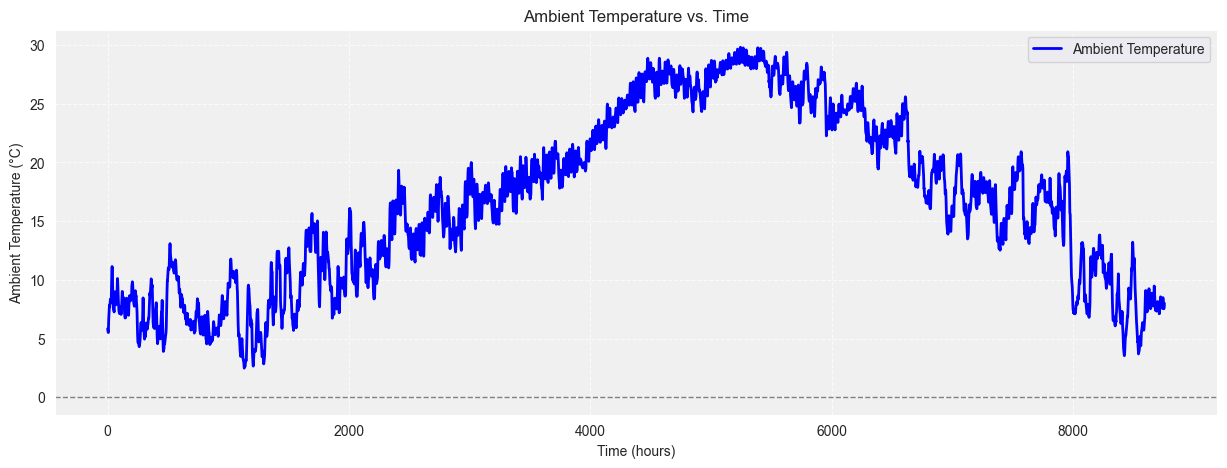

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'dataset' is a Pandas DataFrame with a datetime index
# If not, you may need to convert your time column to a datetime index
# dataset['Time'] = pd.to_datetime(dataset['Time'])
# dataset.set_index('Time', inplace=True)

# Plotting Ambient Temperature vs. Time
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed

# Plotting the data
plt.plot(dataset.index, dataset['T2M'], label='Ambient Temperature', color='blue', linewidth=2)

# Adding labels and title
plt.xlabel('Time (hours)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('Ambient Temperature vs. Time')
plt.legend()  # Display legend if multiple lines are plotted
# Adding grid
plt.grid(True, linestyle='--', alpha=0.7)
# Adding a background color to the plot for better readability
plt.gca().set_facecolor('#F0F0F0')
# Adding a horizontal line at 0°C (optional)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1, label='Freezing Point')
# plt.savefig('temperature.png', dpi=300, bbox_inches='tight')

plt.show()



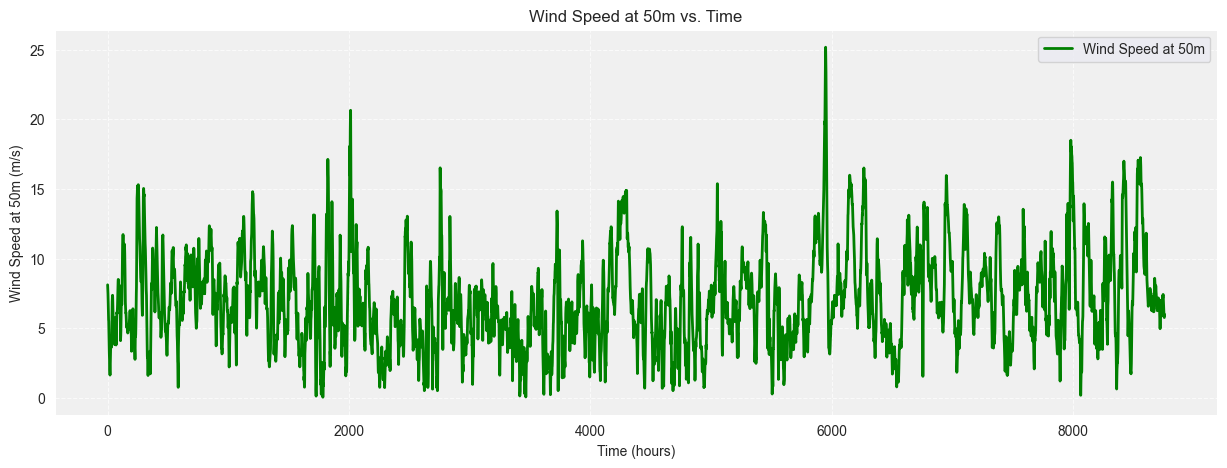

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'dataset' is a Pandas DataFrame with a datetime index
# If not, you may need to convert your time column to a datetime index
# dataset['Time'] = pd.to_datetime(dataset['Time'])
# dataset.set_index('Time', inplace=True)

# Plotting Wind Speed at 50 meters vs. Time
plt.figure(figsize=(15, 5))

# Plotting the data
plt.plot(dataset.index, dataset['WS50M'], label='Wind Speed at 50m', color='green', linewidth=2)

# Adding labels and title
plt.xlabel('Time (hours)')
plt.ylabel('Wind Speed at 50m (m/s)')
plt.title('Wind Speed at 50m vs. Time')
plt.legend()

# Adding grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a background color to the plot
plt.gca().set_facecolor('#F0F0F0')

plt.show()

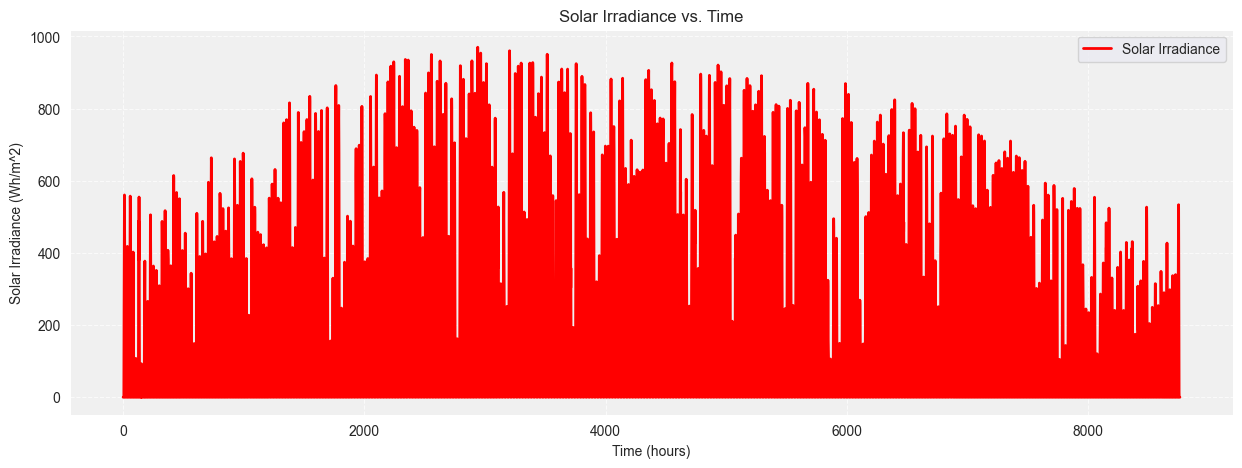

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

dataset['ALLSKY_SFC_SW_DWN'].fillna(0, inplace=True)
dataset['ALLSKY_SFC_SW_DWN'] = dataset['ALLSKY_SFC_SW_DWN'].apply(lambda x: max(0, x))


# Plotting All Sky Surface Shortwave Downward Irradiance vs. Time
plt.figure(figsize=(15, 5))

# Plotting the data
plt.plot(dataset.index, dataset['ALLSKY_SFC_SW_DWN'], label='Solar Irradiance', color='red', linewidth=2)

# Adding labels and title
plt.xlabel('Time (hours)')
plt.ylabel('Solar Irradiance (Wh/m^2)')
plt.title('Solar Irradiance vs. Time')
plt.legend()

# Adding grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a background color to the plot
plt.gca().set_facecolor('#F0F0F0')

# Save the plot as an image (optional)
# plt.savefig('solar_irradiance_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


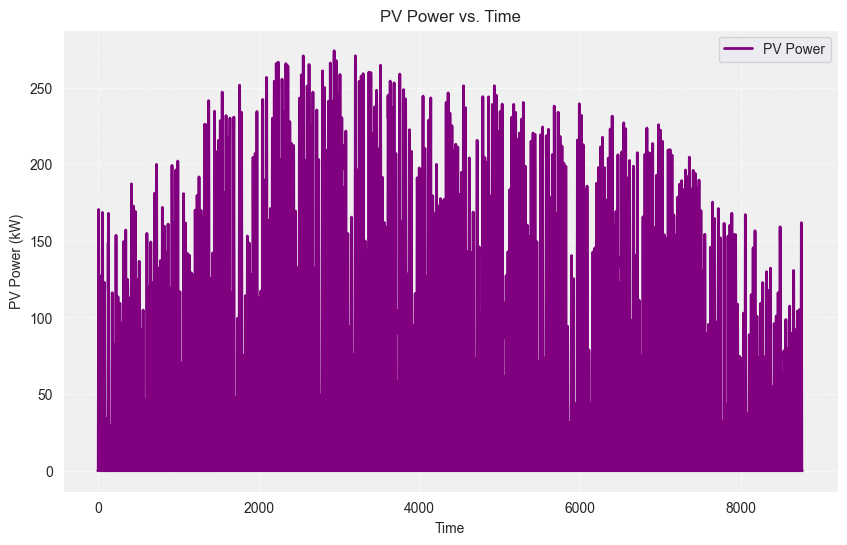

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'dataframe' is your pandas DataFrame with columns T2M and Solar Irradiance
# Make sure to replace 'dataframe' with the actual variable name you are using

# Constants
PvRated = 300  # Rated PV power in kW
k = -3.7e-3  # Temperature coefficient
Iref = 1000  # Reference solar irradiance in W/m^2
Tref = 25    # Reference temperature in degrees Celsius
dataframe = dataset.copy()

# Calculate the power at each timestep using the provided formula
dataframe['T_amb'] = dataframe['T2M'] + 0.0256 * dataframe['ALLSKY_SFC_SW_DWN']
dataframe['Power'] = PvRated * dataframe['ALLSKY_SFC_SW_DWN'] / Iref * (1 + k * (dataframe['T_amb'] - Tref))

# Plotting the calculated power
plt.figure(figsize=(10, 6))

# Plotting the data
plt.plot(dataframe.index, dataframe['Power'], label='PV Power', color='purple', linewidth=2)
#
# Adding labels and title
plt.xlabel('Time')
plt.ylabel('PV Power (kW)')
plt.title('PV Power vs. Time')
plt.legend()

# Adding grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a background color to the plot
plt.gca().set_facecolor('#F0F0F0')

# Save the plot as an image (optional)
# plt.savefig('pv_power_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [17]:
PVdata = pd.DataFrame(dataframe['Power'])
time = pd.to_datetime('2022-01-01') + pd.to_timedelta(dataframe.index, unit='h')
PVdata.index = time

In [19]:
PVdata.to_csv("./Data/PVdata.csv")

In [36]:
import pandas as pd

# Assuming your DataFrame is named 'dataframe'
PVdata = pd.DataFrame(dataframe['Power'])
time = pd.to_datetime('2022-01-01') + pd.to_timedelta(dataframe.index, unit='h')
PVdata.index = time

# Create a function to map the month to the corresponding season
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# Add a 'month' column to PVdata
PVdata['month'] = PVdata.index.month

# Use the get_season function to create a 'season' column
PVdata['Season'] = PVdata['month'].apply(get_season)

# Drop the 'month' column if you don't need it anymore
PVdata.drop('month', axis=1, inplace=True)
PVdata['HR'] = PVdata.index.hour
# Now PVdata contains the 'season' column
PVdata

,Power,Season,HR
2022-01-01 00:00:00,0.0,Winter,0
2022-01-01 01:00:00,0.0,Winter,1
2022-01-01 02:00:00,0.0,Winter,2
2022-01-01 03:00:00,0.0,Winter,3
2022-01-01 04:00:00,0.0,Winter,4
...,...,...,...
2022-12-31 19:00:00,0.0,Winter,19
2022-12-31 20:00:00,0.0,Winter,20
2022-12-31 21:00:00,0.0,Winter,21
2022-12-31 22:00:00,0.0,Winter,22


In [37]:
summer = pd.read_csv("../RandomGen/OptimalSizing/Summer.csv",header=None,usecols=[1]).reset_index()
winter = pd.read_csv("../RandomGen/OptimalSizing/Winter.csv",header=None,usecols=[1]).reset_index()
other = pd.read_csv("../RandomGen/OptimalSizing/Other.csv",header=None,usecols=[1]).reset_index()
# Convert the values in the specified columns to integers
summer["Load"] = summer[1].astype(int)
summer.drop(1, axis=1, inplace=True)
summer = summer.rename(columns={"index":"HR"})
winter["Load"] = winter[1].astype(int)
winter.drop(1, axis=1, inplace=True)
winter = winter.rename(columns={"index":"HR"})
other["Load"] = other[1].astype(int)
other.drop(1, axis=1, inplace=True)
other = other.rename(columns={"index":"HR"})
winter["Season"] = "Winter"
summer["Season"] = "Summer"
other["Season"] = "Spring"
other2 = other.copy()
other2["Season"] = "Autumn"

In [38]:
Loads_24hour_wrt_season = pd.concat([winter,summer,other,other2],axis=0) 
Loads_24hour_wrt_season

,HR,Load,Season
0,0,750,Winter
1,1,753,Winter
2,2,773,Winter
3,3,753,Winter
4,4,760,Winter
...,...,...,...
19,19,1365,Autumn
20,20,1270,Autumn
21,21,1168,Autumn
22,22,1134,Autumn


In [39]:
final = PVdata.merge(Loads_24hour_wrt_season, how='left', left_on=["Season","HR"], right_on=["Season","HR"])

In [41]:
load = final['Load']
load.index = time

In [42]:
load.to_csv("./Data/Load.csv")

In [43]:
load

2022-01-01 00:00:00     750
2022-01-01 01:00:00     753
2022-01-01 02:00:00     773
2022-01-01 03:00:00     753
2022-01-01 04:00:00     760
                       ... 
2022-12-31 19:00:00    1084
2022-12-31 20:00:00    1012
2022-12-31 21:00:00     992
2022-12-31 22:00:00     961
2022-12-31 23:00:00     923
Name: Load, Length: 8760, dtype: int32

In [54]:
file_path = "./Data/Prices.csv"
# Read the data into a DataFrame
df = pd.read_csv(file_path, sep=';').dropna(axis=1)

# Convert the 'Time' column to datetime format
df.index = time

# Replace commas with periods and convert to floating values in the 'Price' column
df['Price'] = df['Price'].str.replace(',', '.').astype(float)

In [56]:
df['Price'].to_csv("./Data/Price.csv")

<Axes: >

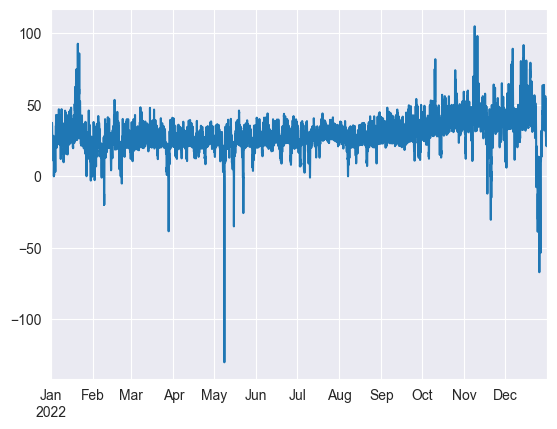

In [58]:
df['Price'].plot()

In [59]:
load.describe()

count    8760.000000
mean     1227.262671
std       321.438111
min       750.000000
25%       992.000000
50%      1167.000000
75%      1365.000000
max      2052.000000
Name: Load, dtype: float64